In [1]:

# Import Numpy for statistical calculations
import numpy as np

# Import Pandas for data manipulation using dataframes
import pandas as pd

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML 

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data



In [2]:
PATH = os.getcwd()
df = pd.read_csv(PATH + '\\CNN-image-dataset-visualisation.csv');

In [3]:
testdata = np.array(pd.read_csv(PATH + '\\CNN-image-dataset-visualisation.csv'), dtype='float32')

In [4]:
embed_count = 2500


In [5]:
X_test = testdata[:embed_count, 2:] / 255
Y_test = testdata[:embed_count, 1]

In [11]:

logdir = 'fashionMNIST-logsss'

# Use this logdir to create a summary writer
summary_writer = tf.summary.FileWriter(logdir)

In [12]:
# Creating the embedding variable with all the images defined above under X_test
embedding_var = tf.Variable(X_test, name='fmnist_embedding')

In [13]:
# Format: tensorflow/contrib/tensorboard/plugins/projector/projector_config.proto
config = projector.ProjectorConfig()

# You can add multiple embeddings. Here I add only one.
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

# Link this tensor to its metadata file (e.g. labels).
embedding.metadata_path = os.path.join('metadata.tsv')

# After constructing the sprite, I need to tell the Embedding Projector where to find it
embedding.sprite.image_path = os.path.join('sprite.png')
embedding.sprite.single_image_dim.extend([28, 28])

In [14]:

# The next line writes a projector_config.pbtxt in the logdir. TensorBoard will read this file during startup.
projector.visualize_embeddings(summary_writer,config)

In [15]:
# Periodically save the model variables in a checkpoint in logdir.
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, os.path.join(logdir, 'model.ckpt'))

In [16]:
rows = 28 
cols = 28
label = ['Shirts','Shoes','Trouser']

sprite_dim = int(np.sqrt(X_test.shape[0]))
sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0 
labels = [] 
for i in range(sprite_dim): 
    for j in range(sprite_dim):
        labels.append(label[int(Y_test[index])])

        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = X_test[index].reshape(28, 28) * -1 + 1

        index += 1

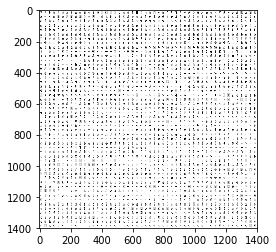

In [17]:
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()